# **Marketing Campaign A/B Testing**

A/B Testing involves analyzing two marketing strategies to choose the best marketing strategy that can convert more traffic into sales (or more traffic into your desired goal) effectively and efficiently.

**Constructed with the PACE Framework (Plan - Analyze - Construct - Execute)**

## Planning
To identify the strongest performing marketing campaign, this notebook will evaluate the campaigns through common marketing objectives:

1. **ROAS:** Identify which campaign is more cost-effective in generating conversions, and returns a higher return on advertisement spend (ROAS).
2. **Reach:** Identify which campaign achieved a higher number of impressions
3. **Engagement:** Identify campaign with more activity within the clicked webpage.

### Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Initial Exploratory Data Analysis

In [71]:
control = pd.read_csv('/content/drive/MyDrive/A Python Learning/AB Testing/control_group.csv',delimiter=';')
test = pd.read_csv('/content/drive/MyDrive/A Python Learning/AB Testing/test_group.csv',delimiter=';')

In [72]:
control.head().T

,0,1,2,3,4
Campaign Name,Control Campaign,Control Campaign,Control Campaign,Control Campaign,Control Campaign
Date,1.08.2019,2.08.2019,3.08.2019,4.08.2019,5.08.2019
Spend [USD],2280,1757,2343,1940,1835
# of Impressions,82702.0,121040.0,131711.0,72878.0,NaN
Reach,56930.0,102513.0,110862.0,61235.0,NaN
# of Website Clicks,7016.0,8110.0,6508.0,3065.0,NaN
# of Searches,2290.0,2033.0,1737.0,1042.0,NaN
# of View Content,2159.0,1841.0,1549.0,982.0,NaN
# of Add to Cart,1819.0,1219.0,1134.0,1183.0,NaN
# of Purchase,618.0,511.0,372.0,340.0,NaN


In [73]:
test.head().T

,0,1,2,3,4
Campaign Name,Test Campaign,Test Campaign,Test Campaign,Test Campaign,Test Campaign
Date,1.08.2019,2.08.2019,3.08.2019,4.08.2019,5.08.2019
Spend [USD],3008,2542,2365,2710,2297
# of Impressions,39550,100719,70263,78451,114295
Reach,35820,91236,45198,25937,95138
# of Website Clicks,3038,4657,7885,4216,5863
# of Searches,1946,2359,2572,2216,2106
# of View Content,1069,1548,2367,1437,858
# of Add to Cart,894,879,1268,566,956
# of Purchase,255,677,578,340,768


### Renaming Columns
The columns will be renamed for easier understanding.

In [74]:
control.columns = ["Campaign Name", "Date", "USD Spend",
                        "Impressions", "Reach", "Website Clicks",
                        "Searches", "Viewed Content", "Added to Cart",
                        "Purchases"]

test.columns = ["Campaign Name", "Date", "USD Spend",
                        "Impressions", "Reach", "Website Clicks",
                        "Searches", "Viewed Content", "Added to Cart",
                        "Purchases"]

In [75]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign Name   30 non-null     object 
 1   Date            30 non-null     object 
 2   USD Spend       30 non-null     int64  
 3   Impressions     29 non-null     float64
 4   Reach           29 non-null     float64
 5   Website Clicks  29 non-null     float64
 6   Searches        29 non-null     float64
 7   Viewed Content  29 non-null     float64
 8   Added to Cart   29 non-null     float64
 9   Purchases       29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign Name   30 non-null     object
 1   Date            30 non-null     object
 2   USD Spend       30 non-null     int64 
 3   Impressions     30 non-null     int64 
 4   Reach           30 non-null     int64 
 5   Website Clicks  30 non-null     int64 
 6   Searches        30 non-null     int64 
 7   Viewed Content  30 non-null     int64 
 8   Added to Cart   30 non-null     int64 
 9   Purchases       30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


### Replacing NA values with mean
It appears the Control campaign group contains errors for one of the campaigns:

In [77]:
control.isna().sum()

Campaign Name     0
Date              0
USD Spend         0
Impressions       1
Reach             1
Website Clicks    1
Searches          1
Viewed Content    1
Added to Cart     1
Purchases         1
dtype: int64

In [78]:
control["Impressions"].fillna(value=control["Impressions"].mean(), inplace=True)
control["Reach"].fillna(value=control["Reach"].mean(), inplace=True)
control["Website Clicks"].fillna(value=control["Website Clicks"].mean(), inplace=True)
control["Searches"].fillna(value=control["Searches"].mean(), inplace=True)
control["Viewed Content"].fillna(value=control["Viewed Content"].mean(), inplace=True)
control["Added to Cart"].fillna(value=control["Added to Cart"].mean(),  inplace=True)
control["Purchases"].fillna(value=control["Purchases"].mean(),  inplace=True)

In [79]:
control.describe(include="all")

,Campaign Name,Date,USD Spend,Impressions,Reach,Website Clicks,Searches,Viewed Content,Added to Cart,Purchases
count,30,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
unique,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Control Campaign,1.08.2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,NaN,NaN,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508
min,NaN,NaN,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,NaN,NaN,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,NaN,NaN,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,NaN,NaN,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000


### Merging Datasets

In [80]:
ab_data = control.merge(test, how="outer").sort_values(["Date"]).reset_index(drop=True)

<ipython-input-80-d31459209743>:1: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.



In [81]:
ab_data.head().T

,0,1,2,3,4
Campaign Name,Control Campaign,Test Campaign,Test Campaign,Control Campaign,Test Campaign
Date,1.08.2019,1.08.2019,10.08.2019,10.08.2019,11.08.2019
USD Spend,2280,3008,2790,2149,2420
Impressions,82702.0,39550.0,95054.0,117624.0,83633.0
Reach,56930.0,35820.0,79632.0,91257.0,71286.0
Website Clicks,7016.0,3038.0,8125.0,2277.0,3750.0
Searches,2290.0,1946.0,2312.0,2475.0,2893.0
Viewed Content,2159.0,1069.0,1804.0,1984.0,2617.0
Added to Cart,1819.0,894.0,424.0,1629.0,1075.0
Purchases,618.0,255.0,275.0,734.0,668.0


### Visualizations

### Pie Chart for All Variables, Test/Control

In [82]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=4, subplot_titles=("USD Spend", "Impressions", "Reach", "Website Clicks",
                                   "Searches", "Viewed Content", "Added to Cart", "Purchases"),
    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
)

for i, column in enumerate(ab_data.columns[2:]):
    fig.add_trace(go.Pie(labels=ab_data["Campaign Name"], values=ab_data.groupby("Campaign Name")[column].sum(), hole=0),
                  row=i // 4 + 1, col=i % 4 + 1)

fig.update_layout(height=500, font=dict(size=13), showlegend=True)
fig.update_traces(textinfo='percent')
fig.show()


It appears the control campaign outperforms the test campaign slightly, particularly in terms of impressions (59.5%), reach(62.4%), and added to cart (59.6%)

It is worth exploring the correlations between these variables for each type of campaign. Therefore the correlation heatmap will be plotted below.

### Correlation Heatmap for All Variables, Test/Control

Text(0.5, 1.0, 'Control Campaign Correlation Heatmap')

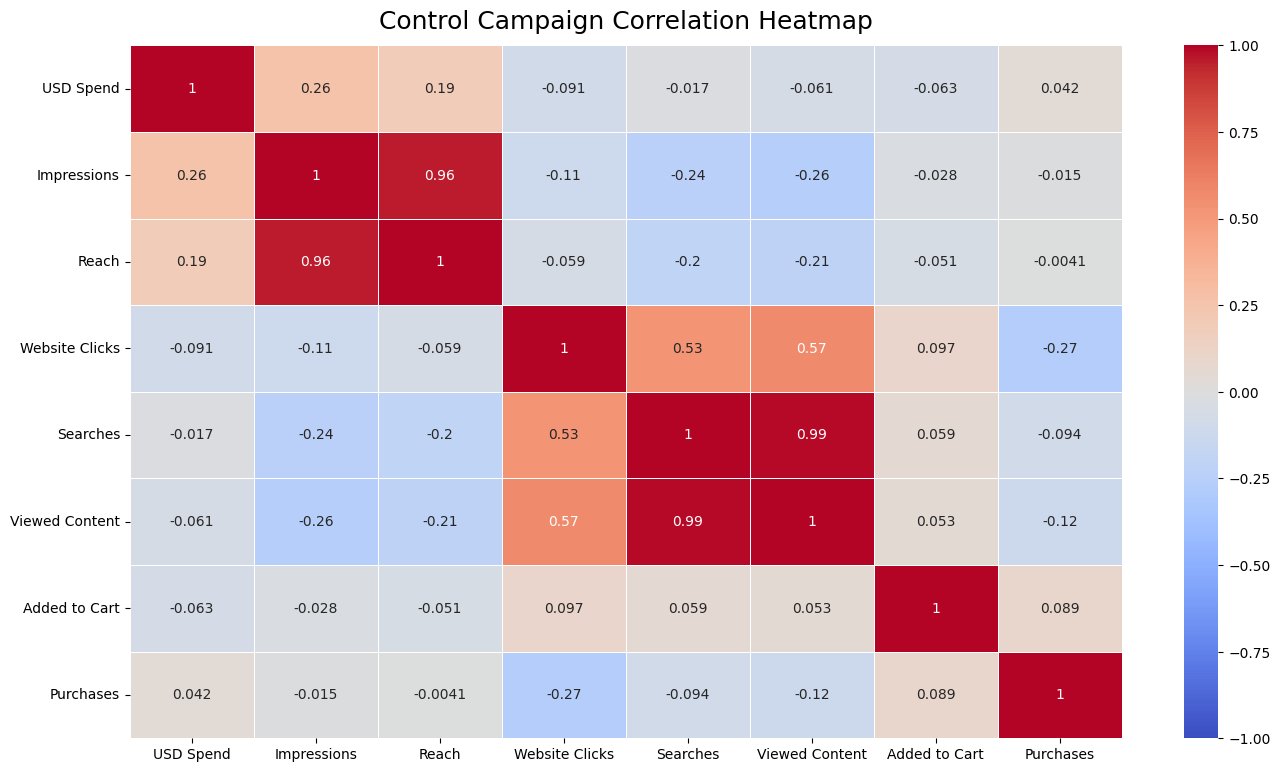

In [83]:
control_corr = control[["USD Spend", "Impressions", "Reach", "Website Clicks",
                                   "Searches", "Viewed Content", "Added to Cart", "Purchases"]].corr()

plt.figure(figsize=(16, 9))
sns.heatmap(control_corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Control Campaign Correlation Heatmap", fontdict={"fontsize": 18}, pad=12)

For control campaigns, there appears to be a stronger correlation between USD Spend and Impressions (0.26) / Reach (0.19). Thus the control campaign may be a good method for the client to reach larger audiences and increase their awareness by increasing their spend on the campaign.

However, the negative correlation between impessions, website clicks and viewed content, suggest that the target audience may not be entirely relevant, as the number of impressions rise, the number of website clicks and viewed content falls. **This suggests that the campaign captures a broader audience and may be for more awareness.**

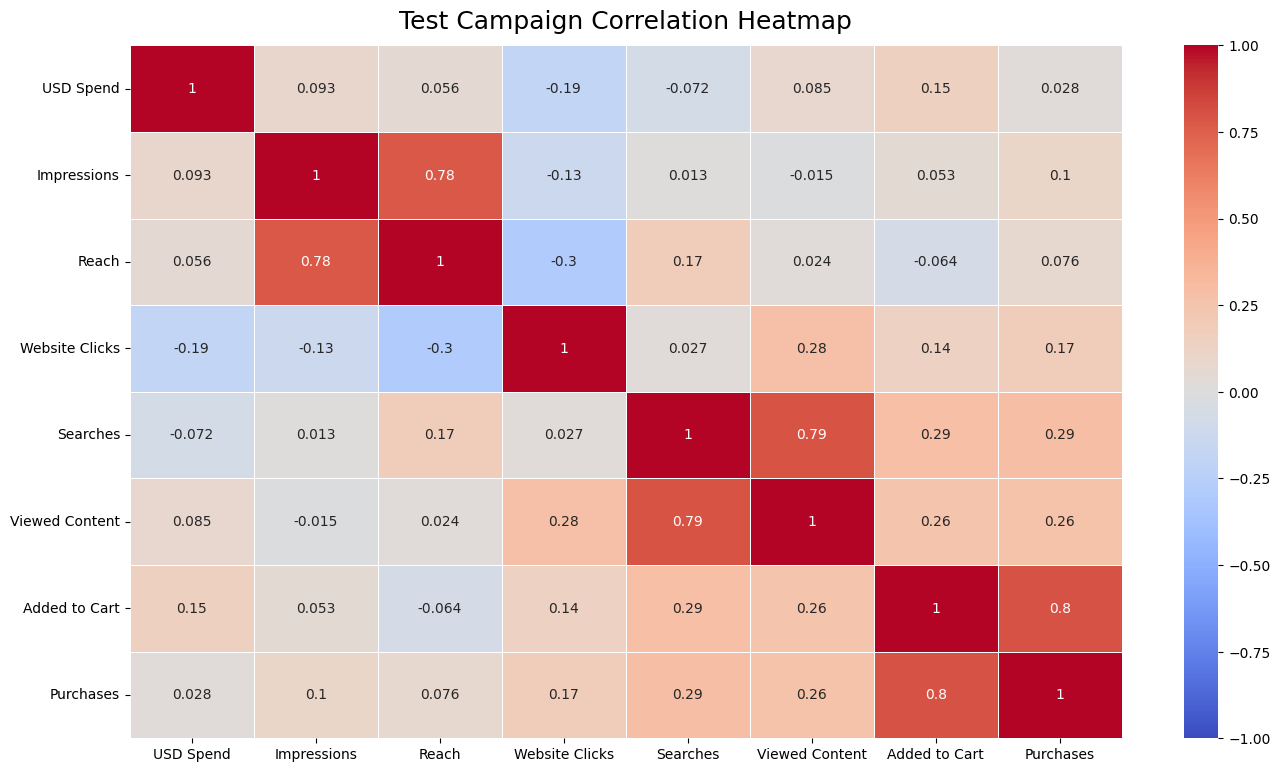

In [84]:
test_corr = test[["USD Spend", "Impressions", "Reach", "Website Clicks",
                                   "Searches", "Viewed Content", "Added to Cart", "Purchases"]].corr()

plt.figure(figsize=(16, 9))
sns.heatmap(test_corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Test Campaign Correlation Heatmap", fontdict={"fontsize": 18}, pad=12)
plt.show()

The test campaign differs from the control campaign in that the amount of spend does not necessarily correlate to higher impressions and reach, but rather to more of the audience adding to cart (15%).

**This suggests the campaign is more focused,** this is supported by the correlation between add to cart and purchases of 80%, suggesting a higher conversion rate. Moreover, the moderately strong correlation between viewed content, website clicks, add to cart, and purchases suggest that the advertisement generally matches what users are searching for.

## Analyze
Further investigation into correlation between variables in Control and Test Marketing Campaigns must be conducted to validate assumptions.

### Identifying Trends in Variables: Scatter Plots

The higher conversion rate from added to cart and purchases is evident in the test campaign when plotted on the scattterplot. However, it is worth noting that the control campaign has resulted in more users adding to cart, but not finishing the purchase, therefore it is recommended to increase the number of follow-up advertisements for the control campaign.

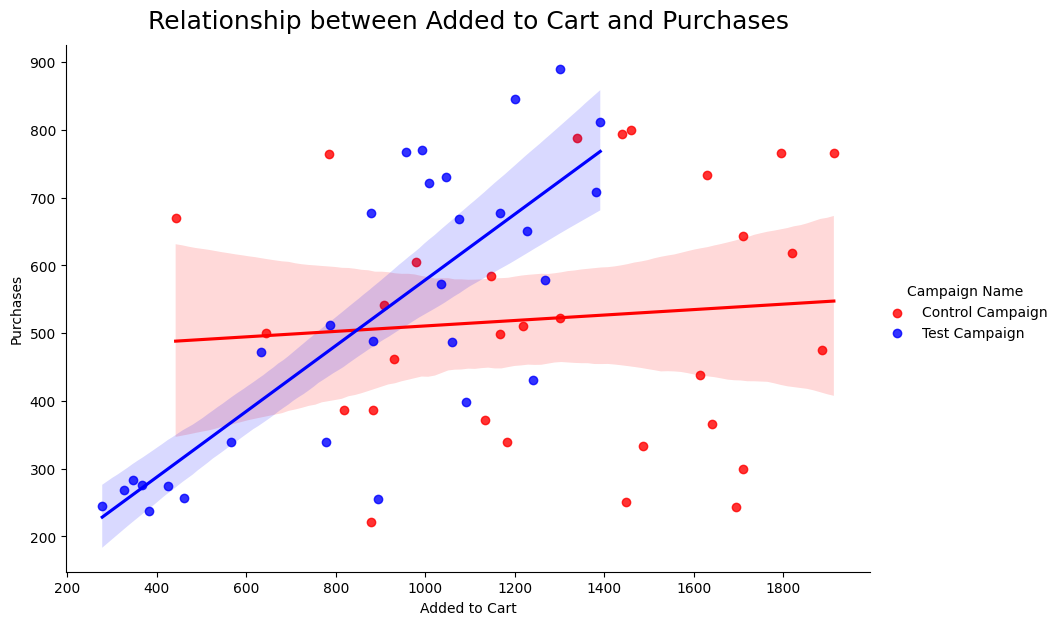

In [85]:
sns.lmplot(x="Added to Cart", y="Purchases", hue="Campaign Name", data=ab_data,
           height=6, aspect=1.5, palette=["red", "blue"])
plt.title("Relationship between Added to Cart and Purchases", fontdict={"fontsize": 18}, pad=12)
plt.show()

Meanwhile, when comparing the total spend and impressions of each campaign, it can be seen that the assumption of a broader campaign for Control is seen, reaching a higher number of impressions (~40,000 more) than the Test Campaign.

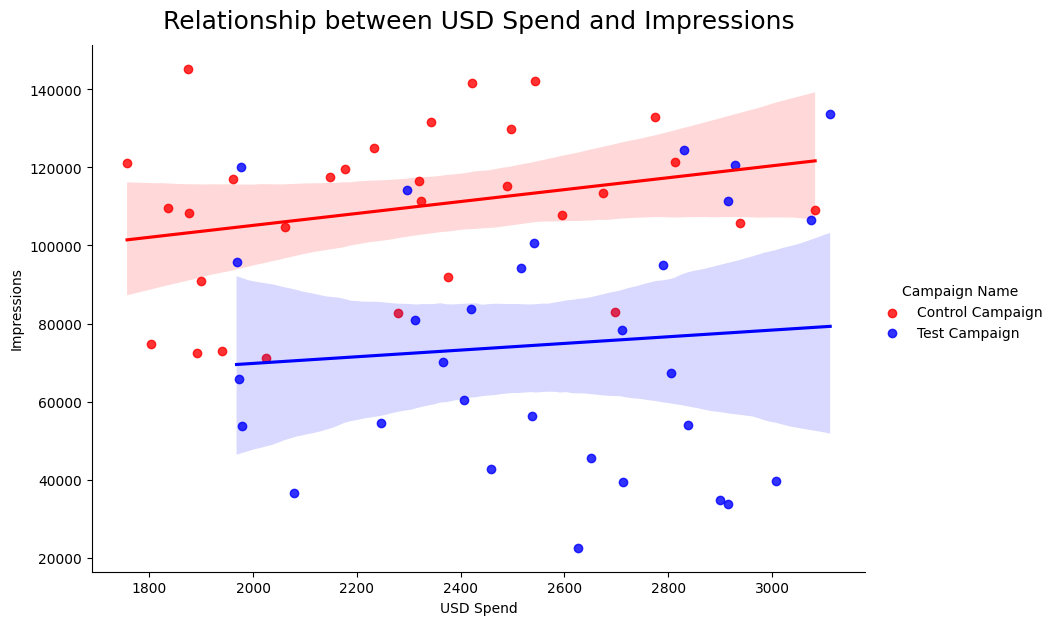

In [86]:
sns.lmplot(x="USD Spend", y="Impressions", hue="Campaign Name", data=ab_data,
           height=6, aspect=1.5, palette=["red", "blue"])
plt.title("Relationship between USD Spend and Impressions", fontdict={"fontsize": 18}, pad=12)
plt.show()

However, as the number of impressions increases, Control campaigns exceeding 120,000 impressions begin receiving a lower engagement than the test campaign, receiving fewer views and suggesting a deterioration in audience quality, whilst the test campaign continuously engages relevant audiences due to its narrower specifications.

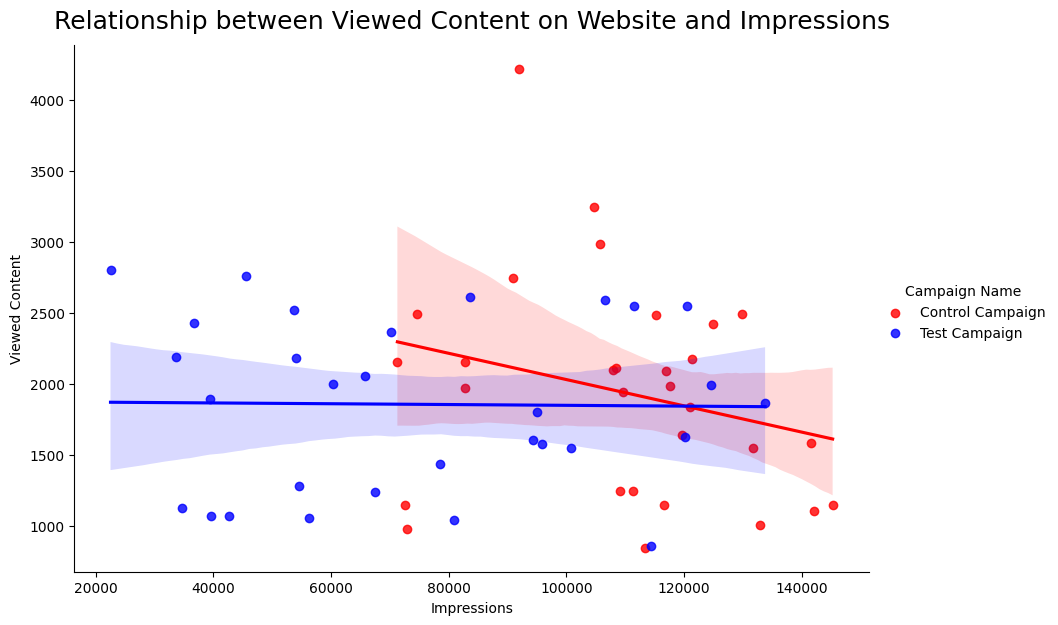

In [87]:
sns.lmplot(x="Impressions", y="Viewed Content", hue="Campaign Name", data=ab_data,
           height=6, aspect=1.5, palette=["red", "blue"])
plt.title("Relationship between Viewed Content on Website and Impressions", fontdict={"fontsize": 18}, pad=12)
plt.show()

When considering overall spend and purchases however, there is no clear trend, suggesting that whilst the control campaign captures a broader market and results in a lower conversion rate, due to its higher number of impressions and add to carts, the outcome of total purchases is similar to the test campaign. Therefore, there is not a strong need to remove one campaign but rather keep both.

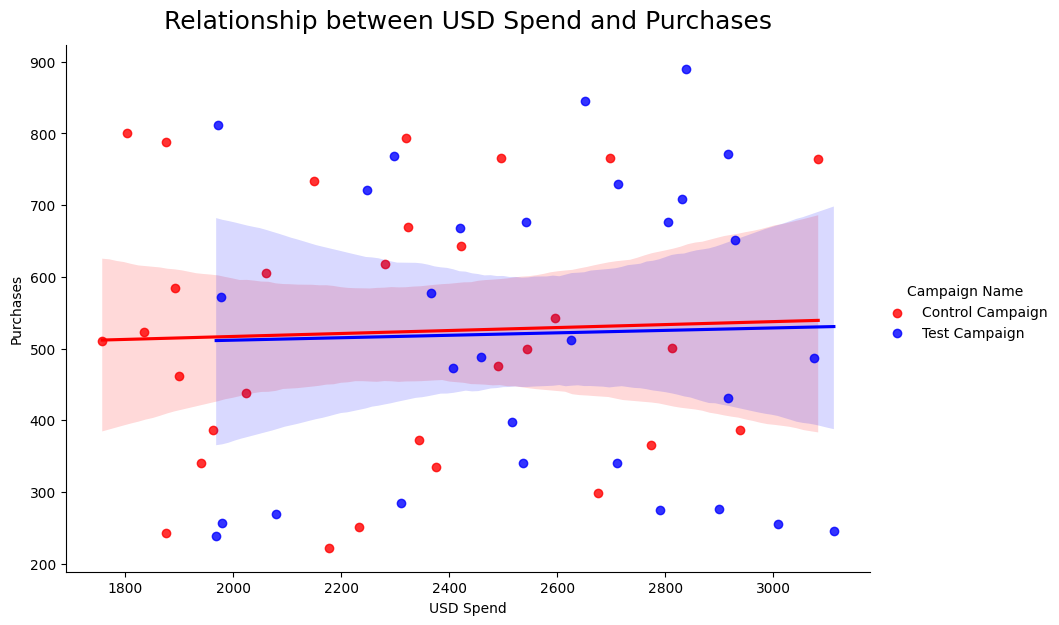

In [88]:
sns.lmplot(x="USD Spend", y="Purchases", hue="Campaign Name", data=ab_data,
           height=6, aspect=1.5, palette=["red", "blue"])
plt.title("Relationship between USD Spend and Purchases", fontdict={"fontsize": 18}, pad=12)
plt.show()

### Investigating the effect of seasonality in Campaign types

In [89]:
ab_data["Date"] = pd.to_datetime(ab_data["Date"], format="%d.%m.%Y")
ab_data.head()

,Campaign Name,Date,USD Spend,Impressions,Reach,Website Clicks,Searches,Viewed Content,Added to Cart,Purchases
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,2019-08-10,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,2019-08-10,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,2019-08-11,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


<ipython-input-90-e97d75d8d4cf>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-90-e97d75d8d4cf>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



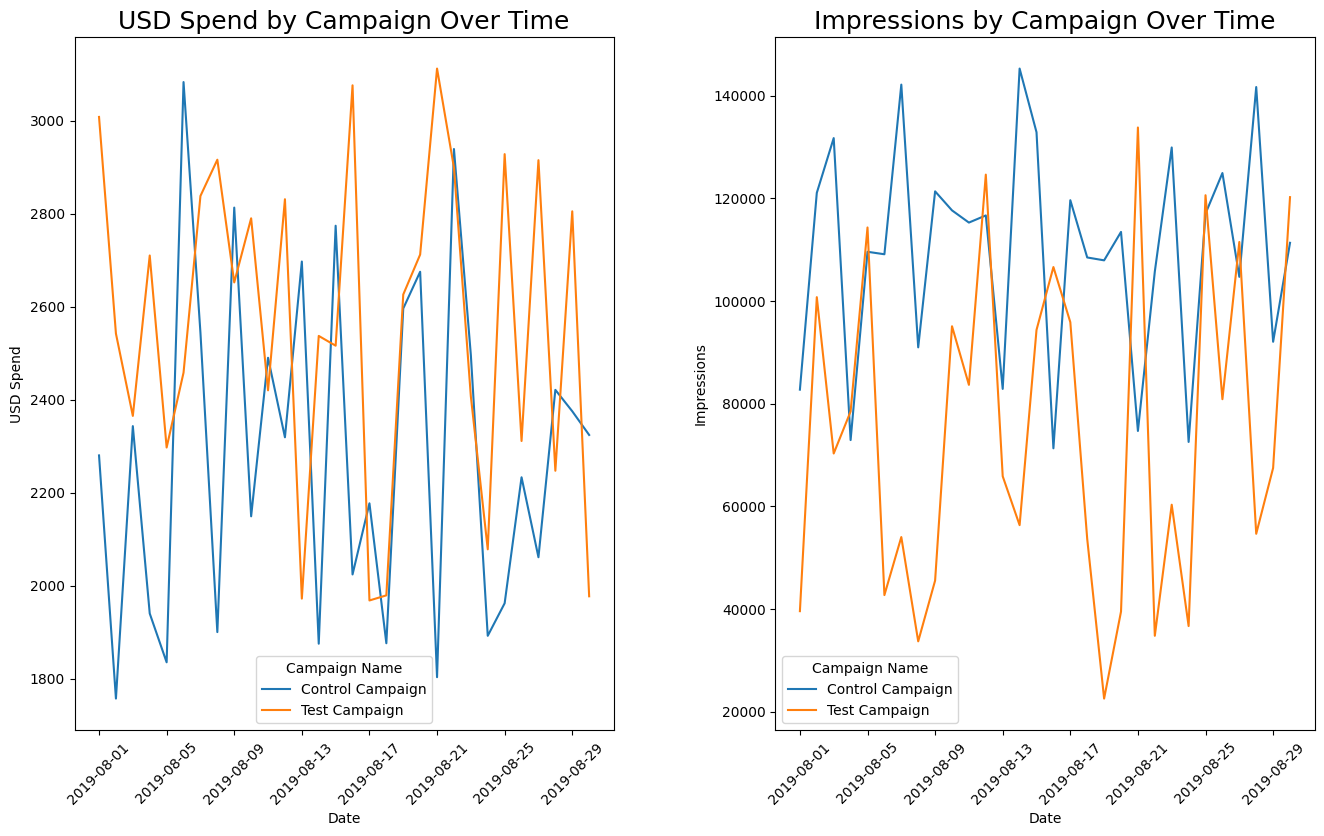

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

# Plot 1 - USD Spend by Campaign Over Time
sns.lineplot(data=ab_data, x="Date", y="USD Spend", hue="Campaign Name", ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("USD Spend by Campaign Over Time", fontsize=18)

# Plot 2 - Impressions by Campaign Over Time
sns.lineplot(data=ab_data, x="Date", y="Impressions", hue="Campaign Name", ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title("Impressions by Campaign Over Time", fontsize=18)

plt.subplots_adjust(wspace=0.3)
plt.show()

There is no significant effect of seasonality on both spend and impressions, thus the time of the marketing campaign will not be taken into account.

### Creating key ratios to evaluate campaign efficacy

Key metrics will be added to the analysis to further evaluate the efficacy of marketing campaigns:
1. **CTR (Click-Through Rate)** measures the percentage of users who click on a specific link or ad compared to the total number of users who viewed it, providing insights into the effectiveness of an ad in generating clicks.
2. **Conversion Rate** refers to the percentage of users who complete a desired action, such as making a purchase or filling out a form, out of the total number of users who interacted with a marketing campaign, indicating the campaign's effectiveness in driving desired conversions.
3. **CPC (Cost per Click)** represents the average cost incurred by advertisers for each individual click on their ads, providing insights into the amount spent to generate user engagement.
4. **ROAS (Return on Advertising Spend)** is a measure that evaluates the revenue generated for every dollar spent on advertising, helping businesses assess the profitability and effectiveness of their marketing campaigns.

In [91]:
test['CTR'] = (test['Website Clicks'] / test['Impressions']) * 100
test['Conversion Rate'] = (test['Purchases'] / test['Website Clicks']) * 100
test['CPC'] = test['USD Spend'] / test['Website Clicks']
test['ROAS'] = ((5*test['Purchases'] - test['USD Spend']) / test['USD Spend']) * 100

In [92]:
control['CTR'] = (control['Website Clicks'] / control['Impressions']) * 100
control['Conversion Rate'] = (control['Purchases'] / control['Website Clicks']) * 100
control['CPC'] = control['USD Spend'] / control['Website Clicks']
control['ROAS'] = ((5*control['Purchases'] - control['USD Spend']) / control['USD Spend']) * 100

In [93]:
# Assuming the revenue of each product sold on the platform is $5
ab_data['CTR'] = (ab_data['Website Clicks'] / ab_data['Impressions']) * 100
ab_data['Conversion Rate'] = (ab_data['Purchases'] / ab_data['Website Clicks']) * 100
ab_data['CPC'] = ab_data['USD Spend'] / ab_data['Website Clicks']
ab_data['ROAS'] = ((5*ab_data['Purchases'] - ab_data['USD Spend']) / ab_data['USD Spend']) * 100

ab_data[['Campaign Name','CTR', 'Conversion Rate','CPC','ROAS']].head()

,Campaign Name,CTR,Conversion Rate,CPC,ROAS
0,Control Campaign,8.483471,8.808438,0.324971,35.526316
1,Test Campaign,7.681416,8.393680,0.990125,-57.613032
2,Test Campaign,8.547773,3.384615,0.343385,-50.716846
3,Control Campaign,1.935829,32.235397,0.943786,70.777106
4,Test Campaign,4.483876,17.813333,0.645333,38.016529


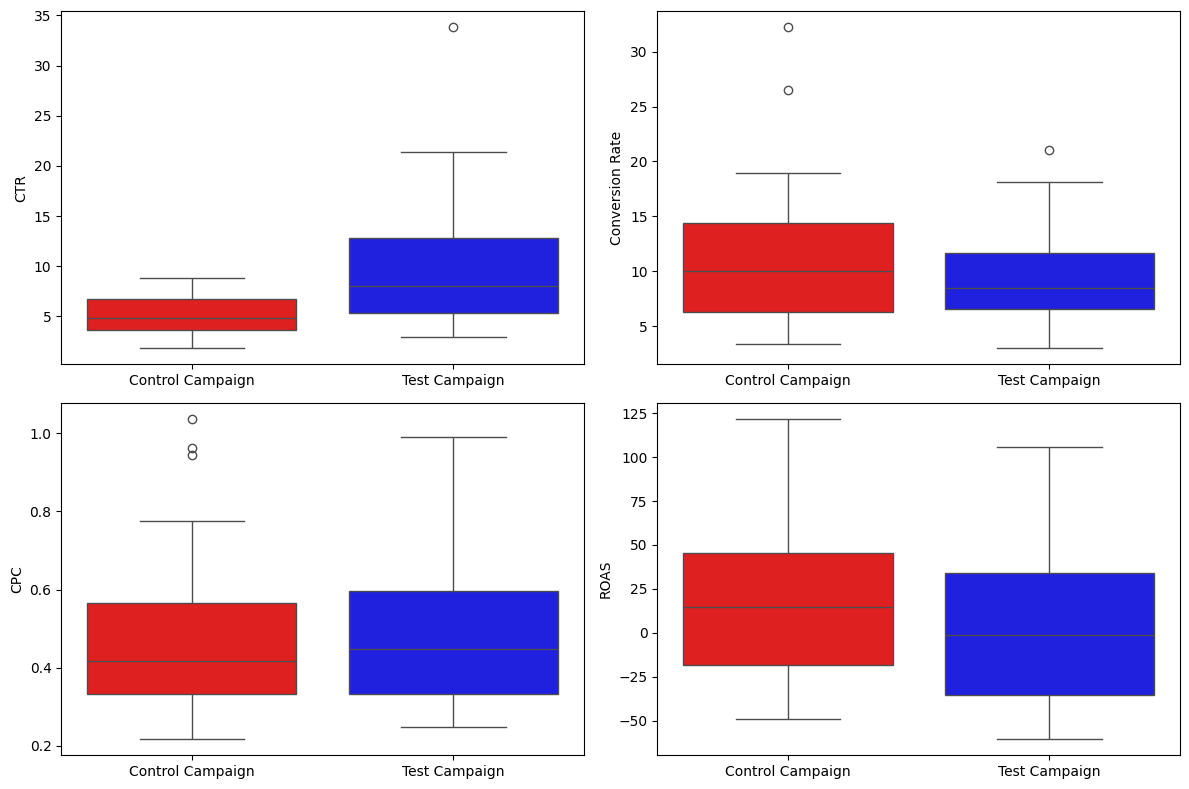

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
colors = ['red', 'blue']

sns.boxplot(x="Campaign Name", y="CTR", data=ab_data, ax=axes[0, 0],hue="Campaign Name",palette=colors).set_xlabel("")
sns.boxplot(x="Campaign Name", y="Conversion Rate", data=ab_data, ax=axes[0, 1],hue="Campaign Name",palette=colors).set_xlabel("")
sns.boxplot(x="Campaign Name", y="CPC", data=ab_data, ax=axes[1, 0],hue="Campaign Name",palette=colors).set_xlabel("")
sns.boxplot(x="Campaign Name", y="ROAS", data=ab_data, ax=axes[1, 1],hue="Campaign Name",palette=colors).set_xlabel("")

plt.tight_layout()

plt.show()


When investigating the boxplots, it can be found that although the clickthrough rate for test campaigns are higher than the control campaign, the control campaign performed better in terms of having a higher conversion rate for website clicks to purchase, lower cost per click, and a higher ROAS assuming the platform product purchase revenue is $5.

This suggests that although the control campaign generates more impressions, the return of the advertisement spend is higher than the test campaign and this should be taken into consideration.

## Construct
A polynomial regression model will be constructed to predict the number of Impressions, Website Clicks and Purchases. This will be used to identify optimum levels of expenditure on Control and Test campaign.

A polynomial regression model extends the concept of linear regression by allowing for non-linear relationships between the predictors and the target variable.

In [95]:
ab_data.describe()

,Date,USD Spend,Impressions,Reach,Website Clicks,Searches,Viewed Content,Added to Cart,Purchases,CTR,Conversion Rate,CPC,ROAS
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2019-08-15 12:00:00,2425.750000,92072.279310,71168.248851,5676.563218,2320.138506,1900.896552,1090.766667,522.013218,7.665076,10.326664,0.479312,10.095334
min,2019-08-01 00:00:00,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000,1.857546,3.008850,0.216646,-60.636247
25%,2019-08-08 00:00:00,2073.750000,69558.250000,43235.500000,4230.750000,1970.750000,1249.000000,863.250000,340.000000,4.315104,6.347943,0.328406,-33.251362
50%,2019-08-15 12:00:00,2420.500000,98281.000000,77422.000000,5581.000000,2374.500000,1959.396552,1082.500000,506.000000,6.076425,8.828477,0.423306,6.296476
75%,2019-08-23 00:00:00,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000,8.437011,13.026990,0.577857,42.874833
max,2019-08-30 00:00:00,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000,33.821766,32.235397,1.037626,121.852468
std,NaN,381.130461,32270.541283,30847.039691,1740.469866,663.473391,681.437956,427.427479,195.297540,5.593326,5.760749,0.198337,44.702354


### Control Dataset
1. Optimum USD Spend for maximum impressions
2. Optimum USD Spend for maximum purchases
3. Optimum USD Spend for maximum ROAS

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



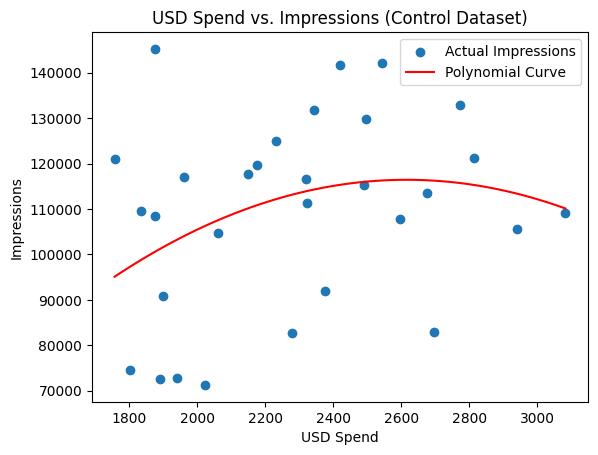

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data = control[["USD Spend", "Impressions"]]

X = data[["USD Spend"]]
y = data["Impressions"]

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Plot the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# Plot the actual Impressions and the curve
plt.scatter(X, y, label='Actual Impressions')
plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')
plt.xlabel('USD Spend')
plt.ylabel('Impressions')
plt.title('USD Spend vs. Impressions (Control Dataset)')
plt.legend()
plt.show()

In [114]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

# Make predictions for the corresponding y values
y_range_pred = model.predict(x_range_poly)

# Find the maximum y value
maximum_y_index = np.argmax(y_range_pred)
maximum_x = x_range[maximum_y_index]

In [98]:
print("Optimum US Spend for Maximum Impressions - Control", maximum_x)

Optimum US Spend for Maximum Impressions - Control [2614.21212121]


It is recommended to set the ad budget for control as $2614, to achieve the maximum number of impressions.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



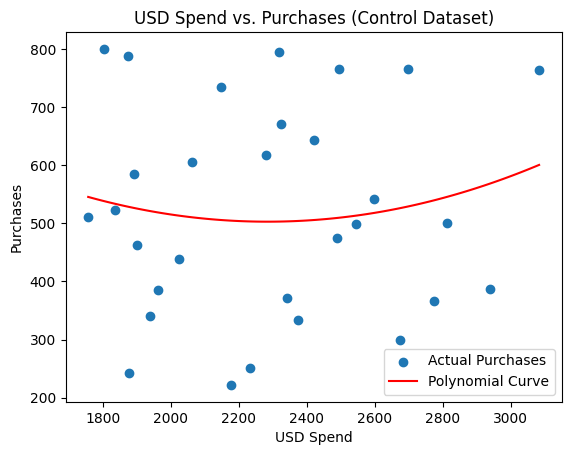

In [119]:
data = control[["USD Spend", "Purchases"]]

X = data[["USD Spend"]]
y = data["Purchases"]

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Plot the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# Plot the actual Purchases and the curve
plt.scatter(X, y, label='Actual Purchases')
plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')
plt.xlabel('USD Spend')
plt.ylabel('Purchases')
plt.title('USD Spend vs. Purchases (Control Dataset)')
plt.legend()
plt.show()

In [113]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

# Make predictions for the corresponding y values
y_range_pred = model.predict(x_range_poly)

# Find the minimum y value
minimum_y_index = np.argmin(y_range_pred)
minimum_x = x_range[minimum_y_index]

In [101]:
print("Minimum US Spend for Maximum Purchases - Control", minimum_x)

Minimum US Spend for Maximum Purchases - Control [2279.36363636]


As the curve is of convex shape, it is recommended to increase the campaign spending above $2,279 to achieve higher Purchases.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



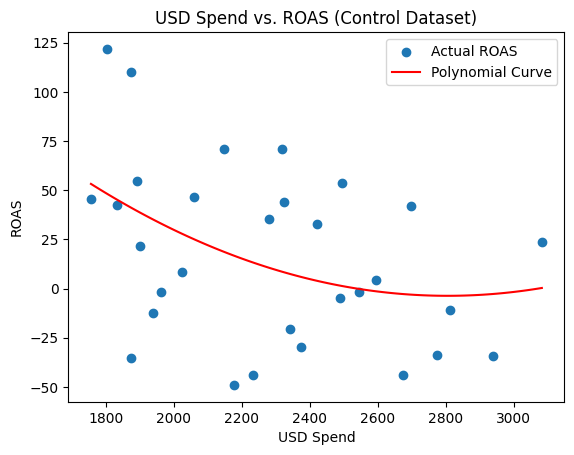

In [102]:
data = control[["USD Spend", "ROAS"]]

X = data[["USD Spend"]]
y = data["ROAS"]

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Plot the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# Plot the actual ROAS and the curve
plt.scatter(X, y, label='Actual ROAS')
plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')
plt.xlabel('USD Spend')
plt.ylabel('ROAS')
plt.title('USD Spend vs. ROAS (Control Dataset)')
plt.legend()
plt.show()

It appears that ROAS drops as the USD Spend increases, bottoming above $3,000. More datapoints are necessary to identify an optimum level of USD Spend.

### Test Dataset
1. Optimum USD Spend for maximum impressions
2. Optimum USD Spend for maximum purchases
3. Optimum USD Spend for maximum ROAS

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



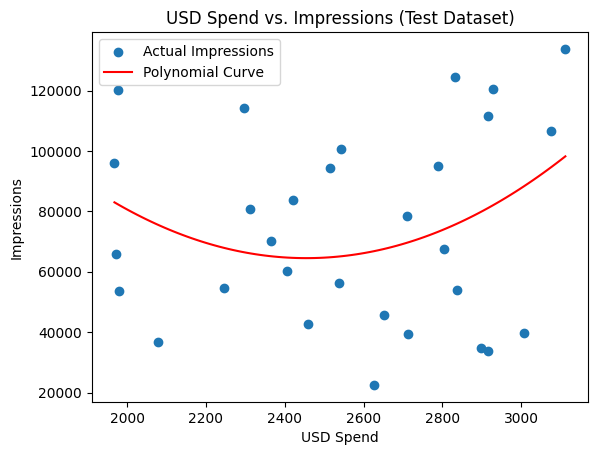

In [103]:
data = test[["USD Spend", "Impressions"]]

X = data[["USD Spend"]]
y = data["Impressions"]

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Plot the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# Plot the actual Impressions and the curve
plt.scatter(X, y, label='Actual Impressions')
plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')
plt.xlabel('USD Spend')
plt.ylabel('Impressions')
plt.title('USD Spend vs. Impressions (Test Dataset)')
plt.legend()
plt.show()

In [115]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

# Make predictions for the corresponding y values
y_range_pred = model.predict(x_range_poly)

# Find the minimum y value
minimum_y_index = np.argmin(y_range_pred)
minimum_x = x_range[minimum_y_index]

In [105]:
print("Minimum US Spend for Maximum Impressions - Test", minimum_x)

Minimum US Spend for Maximum Impressions - Test [2453.33333333]


As the curve is of convex shape, it is recommended to increase the campaign spending above $2,453 to achieve higher impression effects.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



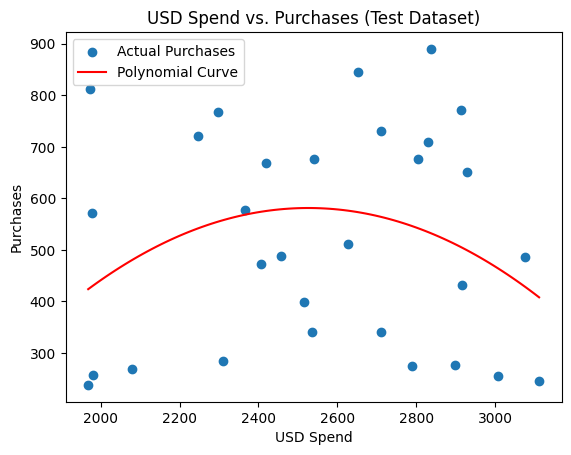

In [118]:
data = test[["USD Spend", "Purchases"]]

X = data[["USD Spend"]]
y = data["Purchases"]

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Plot the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# Plot the actual Purchases and the curve
plt.scatter(X, y, label='Actual Purchases')
plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')
plt.xlabel('USD Spend')
plt.ylabel('Purchases')
plt.title('USD Spend vs. Purchases (Test Dataset)')
plt.legend()
plt.show()

In [116]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

# Make predictions for the corresponding y values
y_range_pred = model.predict(x_range_poly)

# Find the maximum y value
maximum_y_index = np.argmax(y_range_pred)
maximum_x = x_range[maximum_y_index]

In [108]:
print("Maximum US Spend for Maximum Impressions - Test", maximum_x)

Maximum US Spend for Maximum Impressions - Test [2522.66666667]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



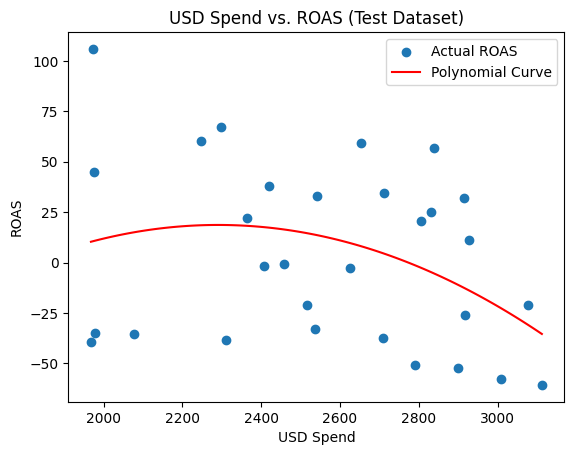

In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data = test[["USD Spend", "ROAS"]]

X = data[["USD Spend"]]
y = data["ROAS"]

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Plot the polynomial regression line
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = model.predict(X_curve_poly)

# Plot the actual ROAS and the curve
plt.scatter(X, y, label='Actual ROAS')
plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')
plt.xlabel('USD Spend')
plt.ylabel('ROAS')
plt.title('USD Spend vs. ROAS (Test Dataset)')
plt.legend()
plt.show()

In [117]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

# Make predictions for the corresponding y values
y_range_pred = model.predict(x_range_poly)

# Find the maximum y value
maximum_y_index = np.argmax(y_range_pred)
maximum_x = x_range[maximum_y_index]

In [111]:
print("Maximum US Spend for Maximum Impressions - Test", maximum_x)

Maximum US Spend for Maximum Impressions - Test [2291.55555556]


### Summary

In [112]:
data = {
    'Campaign Type': ['Control', 'Test'],
    'Opt Spend Impressions': [2614, 'above 2453'],
    'Opt Spend Purchases': ['above 2279', 2522],
    'Opt Spend ROAS': ['above 3000', 2291]
}

df = pd.DataFrame(data)
df.head()

,Campaign Type,Opt Spend Impressions,Opt Spend Purchases,Opt Spend ROAS
0,Control,2614,above 2279,above 3000
1,Test,above 2453,2522,2291


Overall, the optimum spend for different marketing goals are shown above, with a higher spend recommended for control and a lower spend for test.

## Execute

From the A/B Test Analysis, it is identified that the Control campaign targets a broader audience whilst the Test campaign has a more narrow scope.

This results in unique advantages for both campaigns, resulting in a similar performance. For the Control campaign, there is a higher number of impressions and audience that adds the product to the cart. For the Test campaign, there is a higher conversion rate for customers that add the product to cart and finally checkout.

This suggests that there is no need to eliminate one of the campaigns but to let both run concurrently. The suggested USD spend is highlighted in the table below, according to different marketing objective.

**Actionable Business Recommendations**
1. The number of add to carts is high for the control campaign, but the conversion rate is low. The client should consider launching follow-up campaigns to target the audience that has added the product to cart, resulting in higher sales.
2. Run both marketing campaigns simultaneously to achieve higher sales, at the spend points highlighted in the table below. Moreover, run them for longer periods of time (3-4 months, rather than 1 month) to receive more accurate datapoints and allow the algorithm to optimise itself.

In [113]:
# Optimum Spend for Control / Test Campaigns at different marketing objectives
df.head()

,Campaign Type,Opt Spend Impressions,Opt Spend Purchases,Opt Spend ROAS
0,Control,2614,above 2279,above 3000
1,Test,above 2453,2522,2291
